In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
os.getcwd()

'/Users/hyebin/Desktop/github/ML_study/1.회귀분석'

# 1. 데이터 불러오기

In [3]:
# 데이터 불러오기
corolla = pd.read_csv('./data/ToyotaCorolla.csv')
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
# 데이터 수와 변수의 수 확인
nCar = corolla.shape[0]
nVar = corolla.shape[1]
print(nCar, nVar)

1436 37


## 1-1. 원핫인코딩

In [18]:
corolla.Fuel_Type.unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [28]:
encodbox = pd.DataFrame(np.zeros((corolla.shape[0], 3), dtype = int), columns = corolla.Fuel_Type.unique())

for i in range(corolla.shape[0]):
    if corolla.loc[i, 'Fuel_Type'] == 'Diesel':
        encodbox.iloc[i, 0] = 1
    elif corolla.loc[i, 'Fuel_Type'] == 'Petrol':
        encodbox.iloc[i, 1] = 1
    else:
        encodbox.iloc[i, 2] = 1
        
encodbox

,Diesel,Petrol,CNG
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
1431,0,1,0
1432,0,1,0
1433,0,1,0
1434,0,1,0


In [29]:
corolla_ = corolla.drop(['Id', 'Model', 'Fuel_Type'], axis = 1)
mlr_data = pd.concat([corolla_, encodbox], axis = 1)
mlr_data

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Diesel,Petrol,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,1,0,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,1,0,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,1,0,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,1,0,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,86,1,0,1300,3,...,0,1,1,1,0,0,0,0,1,0
1432,10845,72,9,1998,19000,86,0,0,1300,3,...,0,0,1,1,0,0,0,0,1,0
1433,8500,71,10,1998,17016,86,0,0,1300,3,...,0,0,0,1,0,0,0,0,1,0
1434,7250,70,11,1998,16916,86,1,0,1300,3,...,0,0,0,1,0,0,0,0,1,0


In [30]:
# bias 추가
mlr_data = sm.add_constant(mlr_data, has_constant = 'add')
mlr_data.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Diesel,Petrol,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,1,0,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,1,0,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,1,0,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,1,0,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,1,0,0


# 2. 설명변수, 타겟변수 분리 및 학습데이터와 평가데이터 분할

In [37]:
# 특정 변수 제외 가능
feature_columns = list(mlr_data.columns.difference(['Price']))
feature_columns

['ABS',
 'Age_08_04',
 'Airbag_1',
 'Airbag_2',
 'Airco',
 'Automatic',
 'Automatic_airco',
 'BOVAG_Guarantee',
 'Backseat_Divider',
 'Boardcomputer',
 'CD_Player',
 'CNG',
 'Central_Lock',
 'Cylinders',
 'Diesel',
 'Doors',
 'Gears',
 'Guarantee_Period',
 'HP',
 'KM',
 'Met_Color',
 'Metallic_Rim',
 'Mfg_Month',
 'Mfg_Year',
 'Mfr_Guarantee',
 'Mistlamps',
 'Petrol',
 'Power_Steering',
 'Powered_Windows',
 'Quarterly_Tax',
 'Radio',
 'Radio_cassette',
 'Sport_Model',
 'Tow_Bar',
 'Weight',
 'cc',
 'const']

In [35]:
X = mlr_data[feature_columns]
y = mlr_data['Price']

train_x, test_x, train_y, test_y = train_test_split(X, y, train_size = 0.7, test_size = 0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


# 3. 모델 적합

In [46]:
# 회귀 모델 적합
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

In [48]:
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     284.8
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        15:32:57   Log-Likelihood:                -8463.8
No. Observations:                1005   AIC:                         1.700e+04
Df Residuals:                     971   BIC:                         1.716e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -355.1429    139.584     -2.544      0.011    -629.064     -81.222
Age_08_04         -120.9396      4.166    -29.031      0.000    -129.115    -112.764
Airbag_1            11.7339    264.601      0.044      0.965    -507.522     530.989
Airbag_2           -78.4786    141.959     -0.553      0.581    -357.061     200.104
Airco              206.0656     97.631      2.111      0.035      14.473     397.658
Automatic          528.2615    157.787      3.348      0.001     218.619     837.905
Automatic_airco   2361.5259    200.257     11.792      0.000    1968.539    2754.513
BOVAG_Guarantee    578.3901    140.929      4.104      0.000     301.830     854.950
Backseat_Divider  -295.9837    138.007     -2.145      0.032    -566.810     -25.158
Boardcomputer     -197.9926    125.511     -1.577      0.115    -444.296      48.311
CD_Player          144.5072    109.388      1.321      0.187     -70.157     359.172
CNG              -1166.4439    239.191     -4.877      0.000   -1635.835    -697.053
Central_Lock      -101.6935    161.047     -0.631      0.528    -417.734     214.347
Cylinders           -0.0318      0.002    -13.425      0.000      -0.036      -0.027
Diesel             205.6085    191.105      1.076      0.282    -169.417     580.634
Doors               78.7425     42.805      1.840      0.066      -5.258     162.743
Gears              128.9637    218.423      0.590      0.555    -299.671     557.599
Guarantee_Period    68.2831     14.057      4.858      0.000      40.697      95.869
HP                  24.0152      3.626      6.624      0.000      16.900      31.130
KM                  -0.0152      0.001    -10.881      0.000      -0.018      -0.012
Met_Color           26.5148     80.642      0.329      0.742    -131.737     184.767
Metallic_Rim       157.4492    101.065      1.558      0.120     -40.881     355.780
Mfg_Month          -98.2151     11.089     -8.857      0.000    -119.976     -76.454
Mfg_Year             2.3059      0.877      2.629      0.009       0.584       4.027
Mfr_Guarantee      225.5349     78.647      2.868      0.004      71.198     379.872
Mistlamps           31.1990    115.588      0.270      0.787    -195.631     258.029
Petrol             960.8274    204.062      4.709      0.000     560.375    1361.280
Power_Steering    -117.2166    299.177     -0.392      0.695    -704.325     469.891
Powered_Windows    435.1490    161.399      2.696      0.007     118.419     751.879
Quarterly_Tax       13.2893      1.929      6.889      0.000       9.504      17.075
Radio             -107.7975   1136.631     -0.095      0.924   -2338.335    2122.740
Radio_cassette     -35.4605   1136.466     -0.031      0.975   -2265.673    2194.752
Sport_Model        399.8052     95.132      4.203      0.000     213.118     586.492
Tow_Bar           -175.

# 4. VIF를 통한 다중공선성 확인

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(mlr_data.values, i) for i in range(len(mlr_data.columns))]
vif['features'] = mlr_data.columns
vif

/Users/hyebin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/hyebin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


# 5. 시각화를 통한 검증

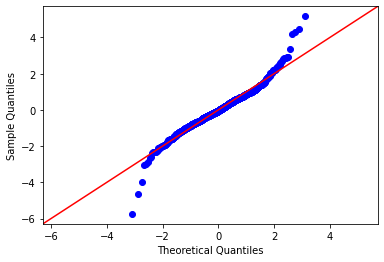

In [51]:
# 학습데이터의 잔차 확인
res = fitted_full_model.resid

# q-q plot 
fig = sm.qqplot(res, fit = True, line = '45')

Text(0, 0.5, 'Residual')

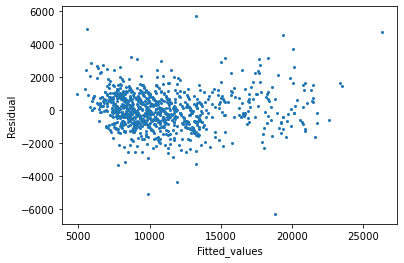

In [53]:
# residual pattern 확인
import matplotlib.pyplot as plt

pred_y = fitted_full_model.predict(train_x)
fig = plt.scatter(pred_y, res, s = 4)
plt.xlabel('Fitted_values')
plt.ylabel('Residual')

# 이정도면 잔차가 균등하게 있음

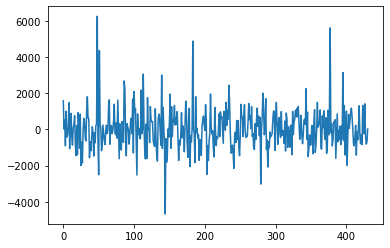

In [55]:
# 검증 데이터에 대한 예측

pred_y2 = fitted_full_model.predict(test_x)
plt.plot(np.array(test_y - pred_y2))

# 6. MSE로 검증

In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
mean_squared_error(test_y, pred_y2)

1238055.0073679695

# 7. 변수선택법

In [ ]:
def processSubset(X, y, feature_set):
    model = sm.OLS(y, X[list(feature_set)])